In [ ]:
# 데이콘 교육용 유튜브 강의및 코드 설명을 필사 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns    

In [40]:
train=pd.read_csv('Desktop/data/train.csv')
test=pd.read_csv('Desktop/data/test.csv')
sample=pd.read_csv('Desktop/data/sample_submission.csv')

In [19]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [20]:
train.shape

(5497, 14)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [22]:
test.head()   #quality feature 삭제

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


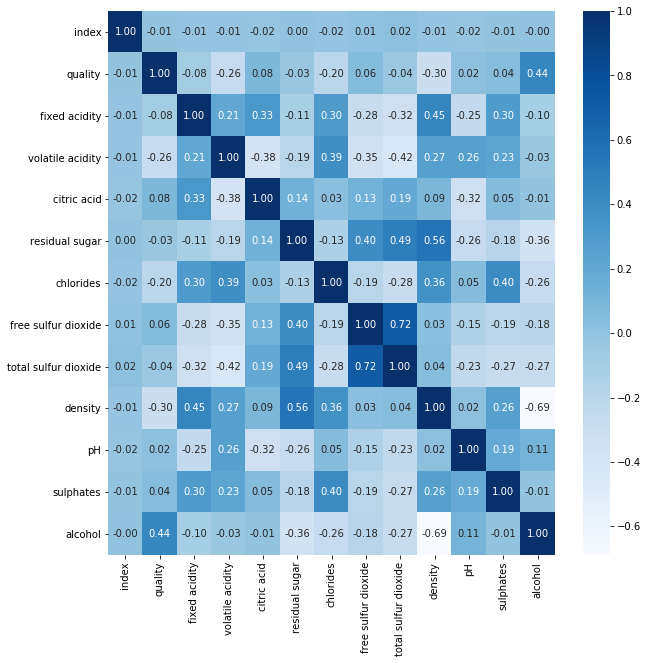

In [23]:
#train data의 상관관계 분포

plt.figure(figsize=(10,10))
sns.heatmap(data=train.corr(),annot=True, fmt = '.2f',cmap='Blues')

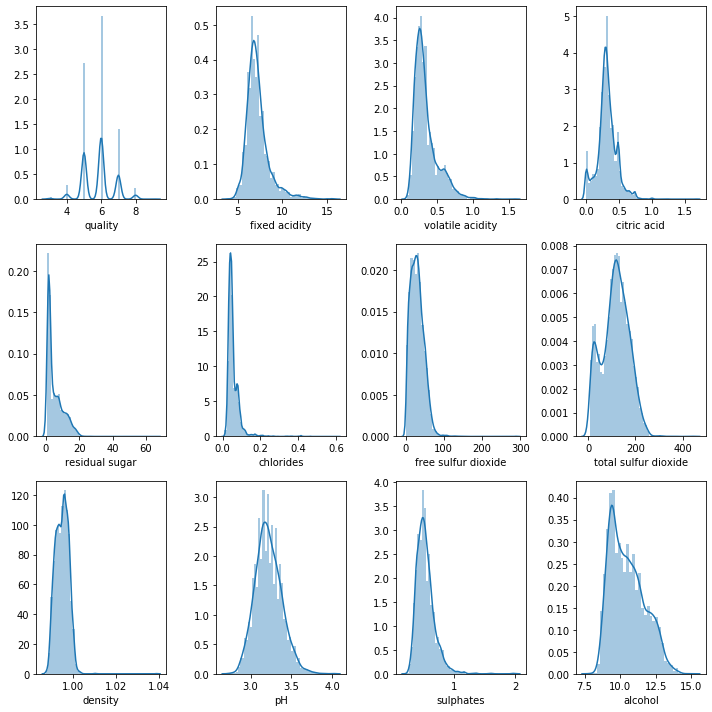

In [26]:
#train의 각 변수별 분포

plt.figure(figsize=(10,10))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])

    
plt.tight_layout()
plt.show()

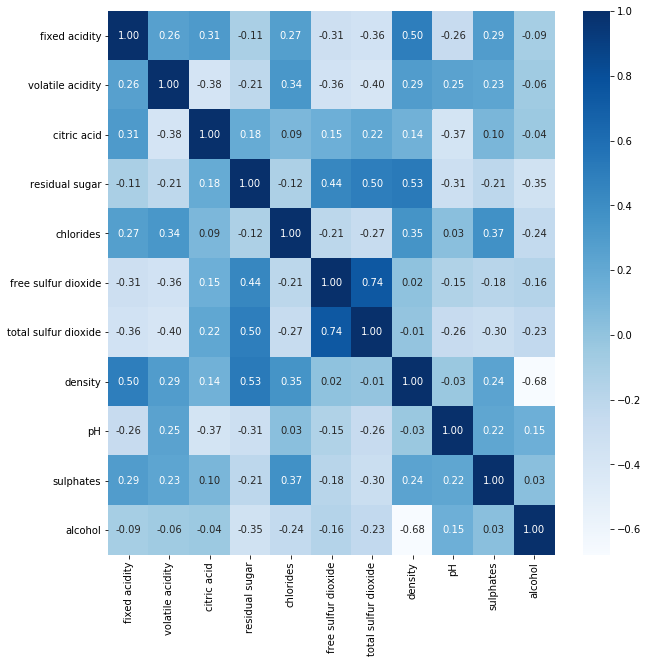

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data=test.corr(),annot=True, fmt = '.2f',cmap='Blues')

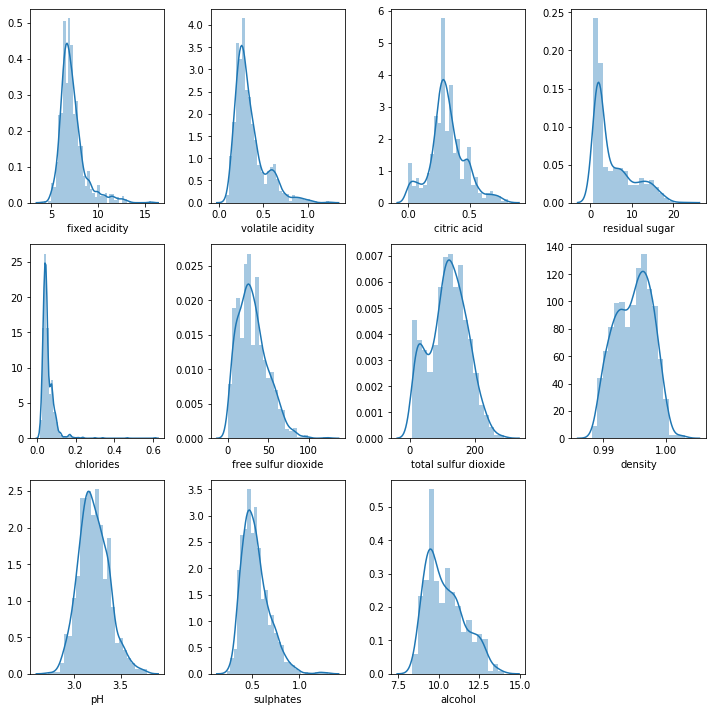

In [27]:
plt.figure(figsize=(10,10))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(test.iloc[:,i])
plt.tight_layout()
plt.show()

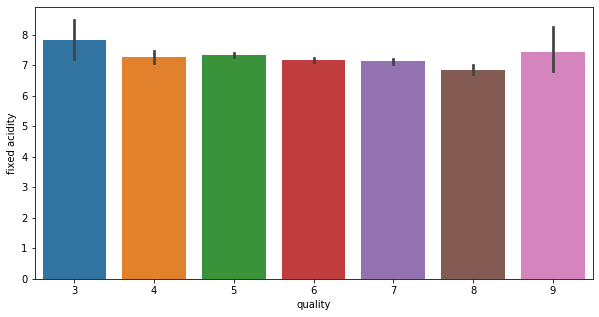

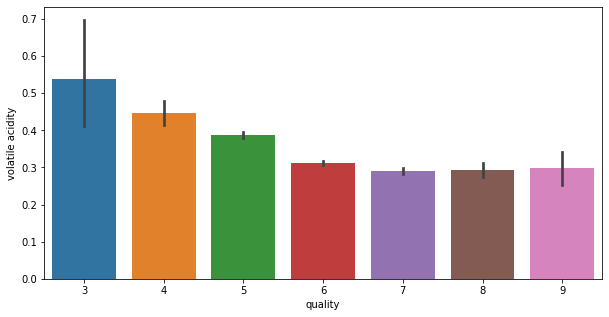

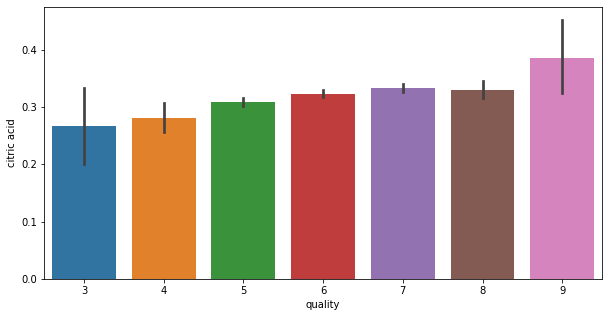

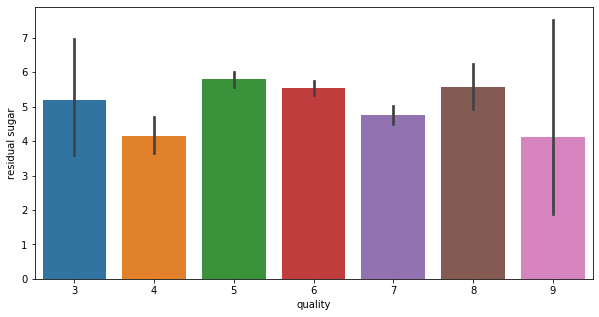

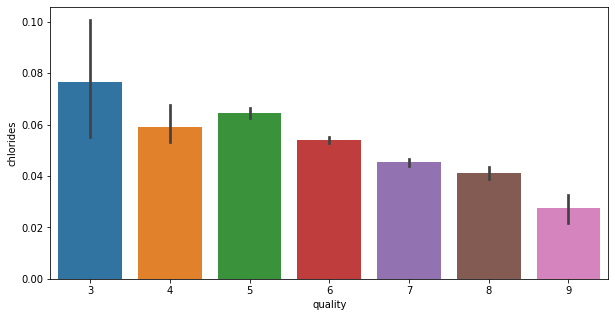

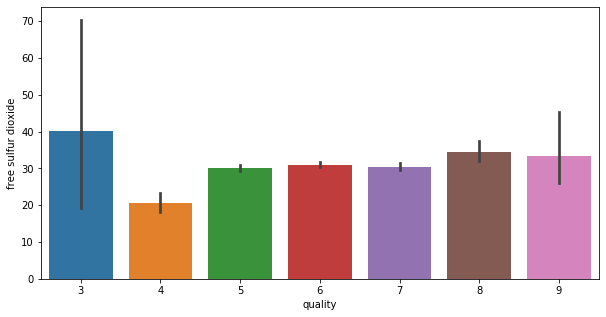

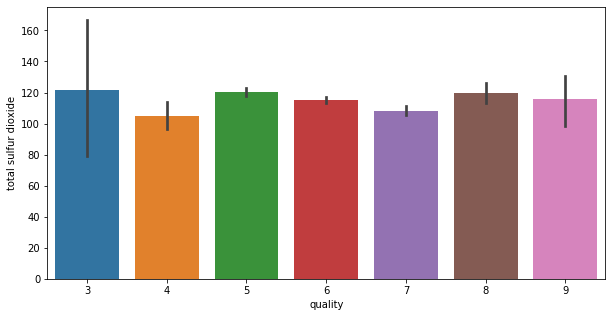

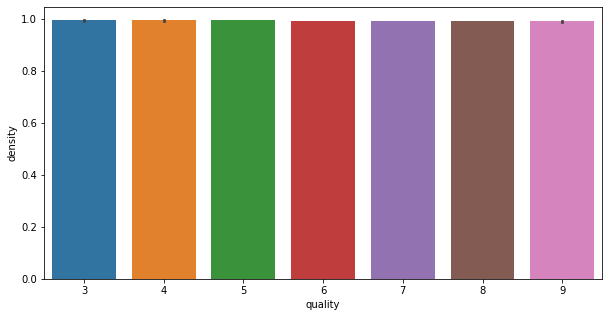

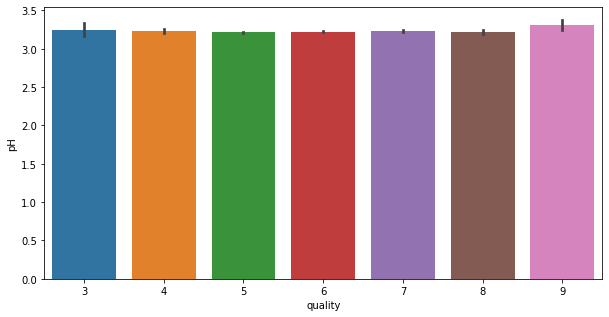

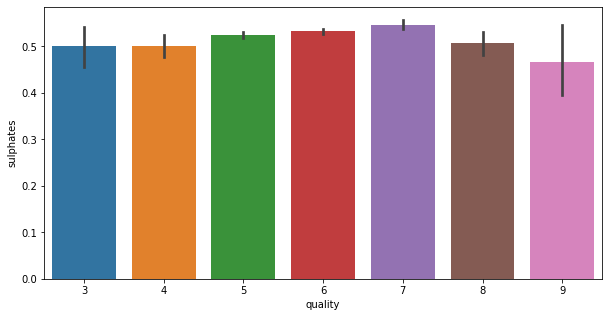

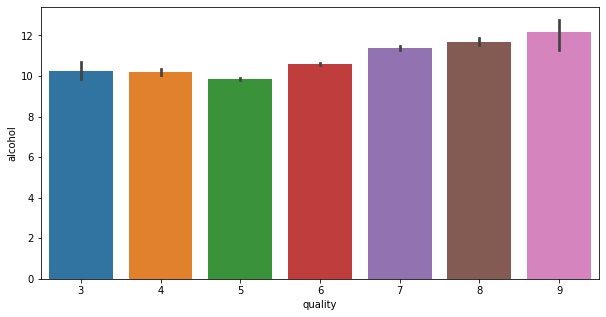

In [28]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
# 이 그림으로 엘레베이터 데이터 분석할때 눈에 확 띄는 분포 찾으면 좋겠네...

for i in range(11):
    fig = plt.figure(figsize = (10,5))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

In [29]:
# type에는 white, red 2가지가 있는데 이를 0과 1로 변환

train['type']=train['type'].map({'white':0, 'red':1}).astype(int)
test['type']=test['type'].map({'white':0, 'red':1}).astype(int)

In [30]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [31]:
train_x=train.drop(['index','quality'],axis=1)
train_y=train['quality']
test_x=test.drop('index',axis=1)

In [32]:
train_x.shape

(5497, 12)

In [33]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [36]:
import lightgbm as lgbm

model = lgbm.LGBMClassifier()
model.fit(train_x,train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
y_pred = model.predict(test_x)

In [38]:
y_pred

array([5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 6, 5, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 4, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 7, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 8, 6, 5, 8, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 7, 5, 7, 5, 6, 7, 7, 6, 6, 6, 7, 6, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 6, 7, 7,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 8, 5, 5, 7, 6,

In [41]:
sample

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


In [43]:
sample['quality']=y_pred
sample

,index,quality
0,0,5
1,1,5
2,2,5
3,3,5
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [44]:
sample.to_csv('Desktop/data/submission,csv',index=False)